<a href="https://colab.research.google.com/github/sleeptiger/Abc-project/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 기초

## 머신러닝이란?

1. 묘사분석(어떤 일이 생겼는가?)
2. 진단 분석(왜 이 일이 생겼는가?)
3. 예측 분석(미래에 무슨일이 생길까?)
4. 처방 분석(무엇을 행동해야하는가?)

- 3번4번이 머신러닝을 활용하는 단계 분석

- 머신러닝으로 할 수 있는 것들
> - 분류, 예측 분석
> - 이미지 인식
> - 음성, 테스트 인식
> - 추천 시스템


## 전처리 기본(정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할)


- 머신러닝의 가장 중요한 부분은 **데이터 전처리**입니다.
- 데이터 분석가의 머신러닝 모델의 성능을 활성하기 위한 작업중 70%이상이 전처리 부분에 해당합니다.
- 전처리 작업에는 **결측값 처리, 정규화, 표준화(수치형), 범주형 데이터의 수치형 변환, 학습/테스트 분할, Feature Engineering emd**이 있다.

In [1]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# 결측값 제거
penguins = penguins.dropna().reset_index(drop=True)

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


### 정규화(Normalization), 표준화(Standardization)

- 정규화와 표준화는 모두 수치형 데이터 전처리에서 중요한 요소입니다.
- 학습 데이터의 feature 간 단위나 스케일(scale)차이가 클수록 학습 모델의 성능이 저하된다.
- 따라서 수치형 데이터의 **단위를 맞춰주는 작업을 스케일링(scaling)이라고 합니다.
- 스케링에는 일정 구간을 정해주는 정규화(Normalization) 방법과 평균(0)과 표준편차(1)를 사용하는 표준화(Standardization) 방법이 있습니다.

- 정규화
> - 0~1사이의 값으로 변환(수치형 컬럼에서만 정규화 가능) 플러스 값으로 표현

- 표준화
> - 평균을 0으로 하고 표준편차를 1로 한다.(비지도 학습 사용시 사용함)(최솟값/최댓값이 설정 안될 시에 사용)

In [5]:
# feature 들 간 단위가 다릅니다. (bill_length_mm/bill_depth_mm/flipper_length_mm)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


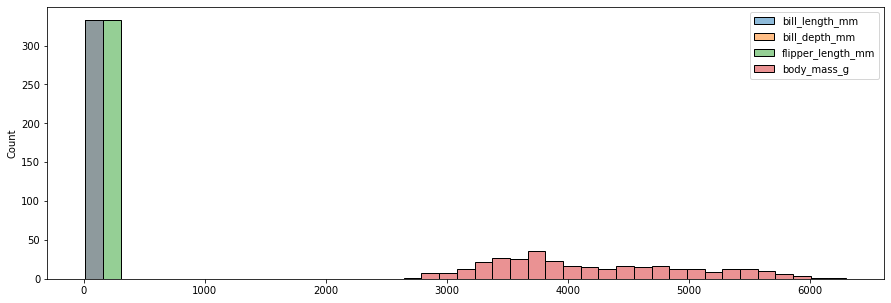

In [6]:
# 도표를 통해 확인 
plt.figure(figsize=(15,5 ))
sns.histplot(data=penguins)
# 데이터의 편차가 너무 심하다 정리가 필요

**정규화(Normalization)**
- `MinMaxScaler`를 활용한 0-1 사이 분포 만들기
- 같은 범위의 데이터로 변환하기 때문에, 모델 학습 성능이 좋아지고, 학습 시간이 줄어드는 효과가 있다.
- 자릿수가 늘어나지 않아 연산 오버플로우(`numeric overflow`)를 방지 할 수있다.

In [7]:
from sklearn.preprocessing import MinMaxScaler # 라이브러리 로딩
scaler = MinMaxScaler() # 스케일러로 정의

penguins_normed = penguins.copy()
features = penguins_normed[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']] # 정규화 대상 선택
features_normed = scaler.fit_transform(features)  #정규화 실행
features_normed.shape

(333, 4)

In [8]:
features_normed
# 순서대로 1 col =bill_length/ 2 col =bill_depth/ 3 col = flipper_length / 4 col = body_mass_g

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [9]:
# 정규화 시킨 데이터 입히기
# .assign (데이터 삽입하기)
penguins_normed = penguins_normed.assign(bill_length_mm = features_normed[:,0],
                                         bill_depth_mm = features_normed[:,1],
                                         flipper_length_mm = features_normed[:,2],
                                         body_mass_g = features_normed[:,3])

penguins_normed

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
4,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.549091,0.071429,0.711864,0.618056,Female
329,Gentoo,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
330,Gentoo,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
331,Gentoo,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


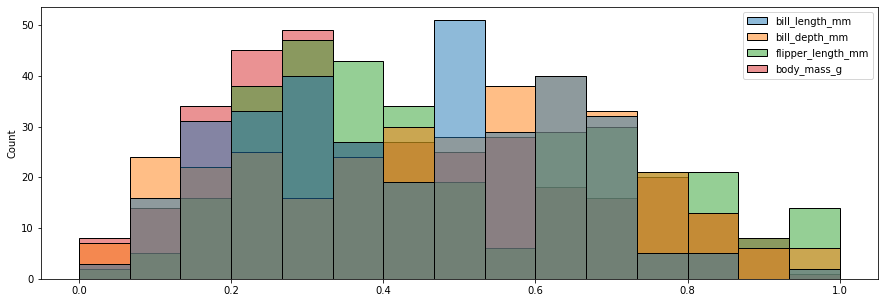

In [10]:
# 눈의로 확인 하기
plt.figure(figsize=(15, 5))
sns.histplot(data=penguins_normed)
# 혼자 떨어져 있는 데이터가 없고 모여있는 데이터로 합쳐졌다.

**표준화(Standardization)**
- `StandardScaler`를 활용한 평균 0, 표준편차 1 분표 만들기
- 만약 Feature 가 단위 차이가 극심하게 차이가 나는 상황이라면, 정규화 보다는 표준화 방법이 선호된다.      (정규화는 작은 범위로 데이터를 압축하기 때문에 정보 손실이 발생한다.)
- 비지도 학습(최대 최소 범위를 알기 힘든 상황)에서도 **표준화 방법**이 선호됩니다.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 스케일러 정의 

penguins_stand = penguins.copy()
features = penguins_stand[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # 표준화 대상 지정
features_stand = scaler.fit_transform(features) # 표준화 

In [12]:
# .assign (데이터 삽입하기)
penguins_stand = penguins_stand.assign(bill_length_mm = features_stand[:,0],
                                         bill_depth_mm = features_stand[:,1],
                                         flipper_length_mm = features_stand[:,2],
                                         body_mass_g = features_stand[:,3])

penguins_stand

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


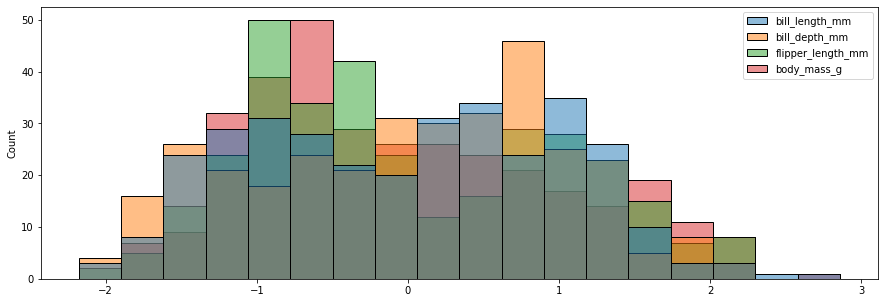

In [13]:
# 눈으로 확인
plt.figure(figsize=(15,5))
sns.histplot(data=penguins_stand)

### **범주형 데이터의 수치화 (인코딩,Encoding)**
> - scikt-learn의 머신 러닝 알고리즘은 범주형 데이터를 계산할 수 없습니다.
> - 따라서 일반적으로 범주형 데이터를 수치화(인코딩)해서 사용합니다.
> - 범주형 데이터 수치화 방법 : 대표적으로 `라벨 인코딩(Label Encoding), 원핫 인코딩(One-hot Encoding)` 방법이 있습니다.

In [14]:
penguins_stand

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


In [15]:
penguins_stand['island'].unique()
# 3가지의 value 존재    

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [16]:
penguins_stand['sex'].unique()
# 남/녀 2개 존재

array(['Male', 'Female'], dtype=object)

> 라벨 인코딩 (`Label Encoding`)
> - 범주형 데이터의 범주 가짓수에 따라 숫자를 할당해주는 방법입니다.

In [17]:
from sklearn.preprocessing import LabelEncoder # 라이브러리 로딩
encoder = LabelEncoder() 

penguins_label = penguins_stand.copy()
features = penguins_label[['species', 'island', 'sex']] # 인코딩 할 대상
encoded = features.apply(encoder.fit_transform)
encoded

,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0
3,0,2,0
4,0,2,1
...,...,...,...
328,2,0,0
329,2,0,0
330,2,0,1
331,2,0,0


In [18]:
# 수치형 데이터로 바꾸지
penguins_label = penguins_label.assign(species = encoded['species'],
                                       island = encoded['island'],
                                       sex = encoded['sex'])

penguins_label

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...
328,2,0,0.587352,-1.762145,0.931283,0.892957,0
329,2,0,0.514098,-1.457000,1.002739,0.799674,0
330,2,0,1.173384,-0.744994,1.502928,1.919069,1
331,2,0,0.221082,-1.202712,0.788372,1.234995,0


> 원 핫 인코딩 (`One Hot Encoding`)
> - 범주형 데이터의 범주 가짓수에 컬럼을 추가 해주는 방법입니다.
> - 범주에 포함되는 컬럼에 1을 부여하고 다른 컬럼을 0을 부여한다.

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

penguins_onehot = penguins_stand.copy()
features = penguins_onehot[['species', 'island', 'sex']]
encoded = encoder.fit_transform(features).toarray() 

In [20]:
encoded

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [21]:
encoder.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [22]:
# 기존 범주형 컬럼 버리기
penguins_onehot = penguins_onehot.drop(columns=['species', 'island', 'sex'])

#인코딩 결과 프레임 생성
encoded_df = pd.DataFrame(encoded)
encoded_df.columns = encoder.get_feature_names_out()

#기존 데이터 프레임과 결함
penguins_onehot = pd.concat([penguins_onehot, encoded_df], axis=1)

In [23]:
penguins_onehot

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,-0.896042,0.780732,-1.426752,-0.568475,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.822788,0.119584,-1.069474,-0.506286,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.676280,0.424729,-0.426373,-1.190361,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-1.335566,1.085877,-0.569284,-0.941606,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.859415,1.747026,-0.783651,-0.692852,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
329,0.514098,-1.457000,1.002739,0.799674,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
330,1.173384,-0.744994,1.502928,1.919069,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
331,0.221082,-1.202712,0.788372,1.234995,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### 학습/테스트 데이터 세트 분할


- scikt-learn 은 학습 데이터 세트를 자동으로 분할해주는 기능을 제공합니다.
- 테스트에 사용하고 싶은 데이터를 비율로 조종할 수 있다.

In [24]:
penguins_label.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1


In [25]:
from sklearn.model_selection import train_test_split

X = penguins_label.drop('sex', axis=1)      # 예측에 사용되는 변수
Y = penguins_label['sex']                   # 예측할 변수

In [26]:
#학습/테스트 세트 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [27]:
len(X_train), len(Y_train), len(Y_test), len(Y_test)

(266, 266, 67, 67)

In [28]:
X_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
323,2,0,-0.090248,-0.999282,0.859828,0.550920
311,2,0,1.301579,-0.338134,1.717295,1.297183
175,1,1,1.612908,1.441880,0.288183,0.426543
9,0,2,-1.720150,2.001313,-0.212006,0.239977
86,0,1,-1.830031,-0.032989,-1.140929,-1.003795
...,...,...,...,...,...,...
54,0,0,-1.518701,-0.134704,-1.140929,-1.314738
216,2,0,0.862055,-1.558715,0.645461,0.302166
163,1,1,2.565211,0.323014,-1.426752,-0.630663
140,0,1,-0.877728,0.729875,-0.783651,0.053411


In [29]:
Y_test

299    1
211    1
123    1
168    0
289    1
      ..
82     1
124    0
219    0
189    0
20     0
Name: sex, Length: 67, dtype: int64

> ### **로지스틱 회귀**
> - 로지스틱 회귀(Logistic Regression)은 **대표적인 2진 분류 머신러닝 알고리즘**이다.
> - 회귀(Regression) + 시그모이드(Sigmoid Fuction)함수를 사용해서 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측해줍니다. (2진분류 = 2가지의사항 ex:남자/여자, 참/거짓...) (시그모이드 함수 = S자형)
> - 회귀 방법론은 변수들 사이의 관계를 '모델링'하는 기법이다. (X와 Y의 관계)
> - ex) 스팸일 확률이 0.5이상이면 스팸으로 분류하고, 0.5보다 작으면 정상 메일로.분류한다.

1. [Lr]모델링 정의

In [30]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(verbose=2)

In [31]:
# 파리미터 종류
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

2. [LR] 모델 학습

In [32]:
lr_model.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=2)

3. [LR] 예측

In [33]:
# 수컷 = 1/ 암컷 = 0
predictions = lr_model.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1])

In [34]:
#성능 평가
from sklearn.metrics import accuracy_score # 정확도를 나타내는 라이브러리
lr_acc = accuracy_score(Y_test, predictions)
print('Logistic Regression 모델의 예측 정확도는 {}% 입니다.'.format(round(lr_acc*100)))

Logistic Regression 모델의 예측 정확도는 87% 입니다.


> ### 최근접 이웃 분류기(KNeighborsClassifier)
> - 입력데이터가 주어졌을때, 입력 값과 가까운 K개의 데이터가 속해 있는 범주를 예측 해주는 알고리즘
> - 데이터 간 거리를 측정할 때 '유클리디안 거리'를 사용한다. 실제로 떨어져있는 거리

1. [KNC]모델 정의

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier()

In [36]:
# 파라미터 종류
knc_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

2. [KNC] 모델 학습

In [37]:
knc_model.fit(X_train, Y_train)

KNeighborsClassifier()

3. [KNC]예측

In [38]:
#수컷 = 1/ 암컷 = 0
predictions = knc_model.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0])

In [39]:
# 성능 평가
knc_acc = accuracy_score(Y_test, predictions)
print('KNeighborsClassifier 모델의 예측 정확도는 {}% 입니다.'.format(round(knc_acc*100)))

KNeighborsClassifier 모델의 예측 정확도는 96% 입니다.


> ### 의사결정나무(Decision Tree)
> - 의사 결정 나무(Decision Tree)란 의사 결정 규칙을 나무(tree)구조로 나타내어서**전체 데이터를 분류** 하거나, **수치형 자료를 예측**하는데 모두 사용할 수 있는 알고리즘입니다.
> - 의사결정 나무 알고리즘은 **가지분할(split)**, **가지치기(pruning)**방법을 사용해서 복잡한 모델에서 단순화 과정을 거칩니다.
> - 나무 모형의 크기에 따라 머신 러닝 성능이 달라지기 때문에 적절한 크기로 설정해주어야 한다.

1. [DT] 모델 정의

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

In [41]:
dtc_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

2. [DT]모델 학습

In [42]:
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

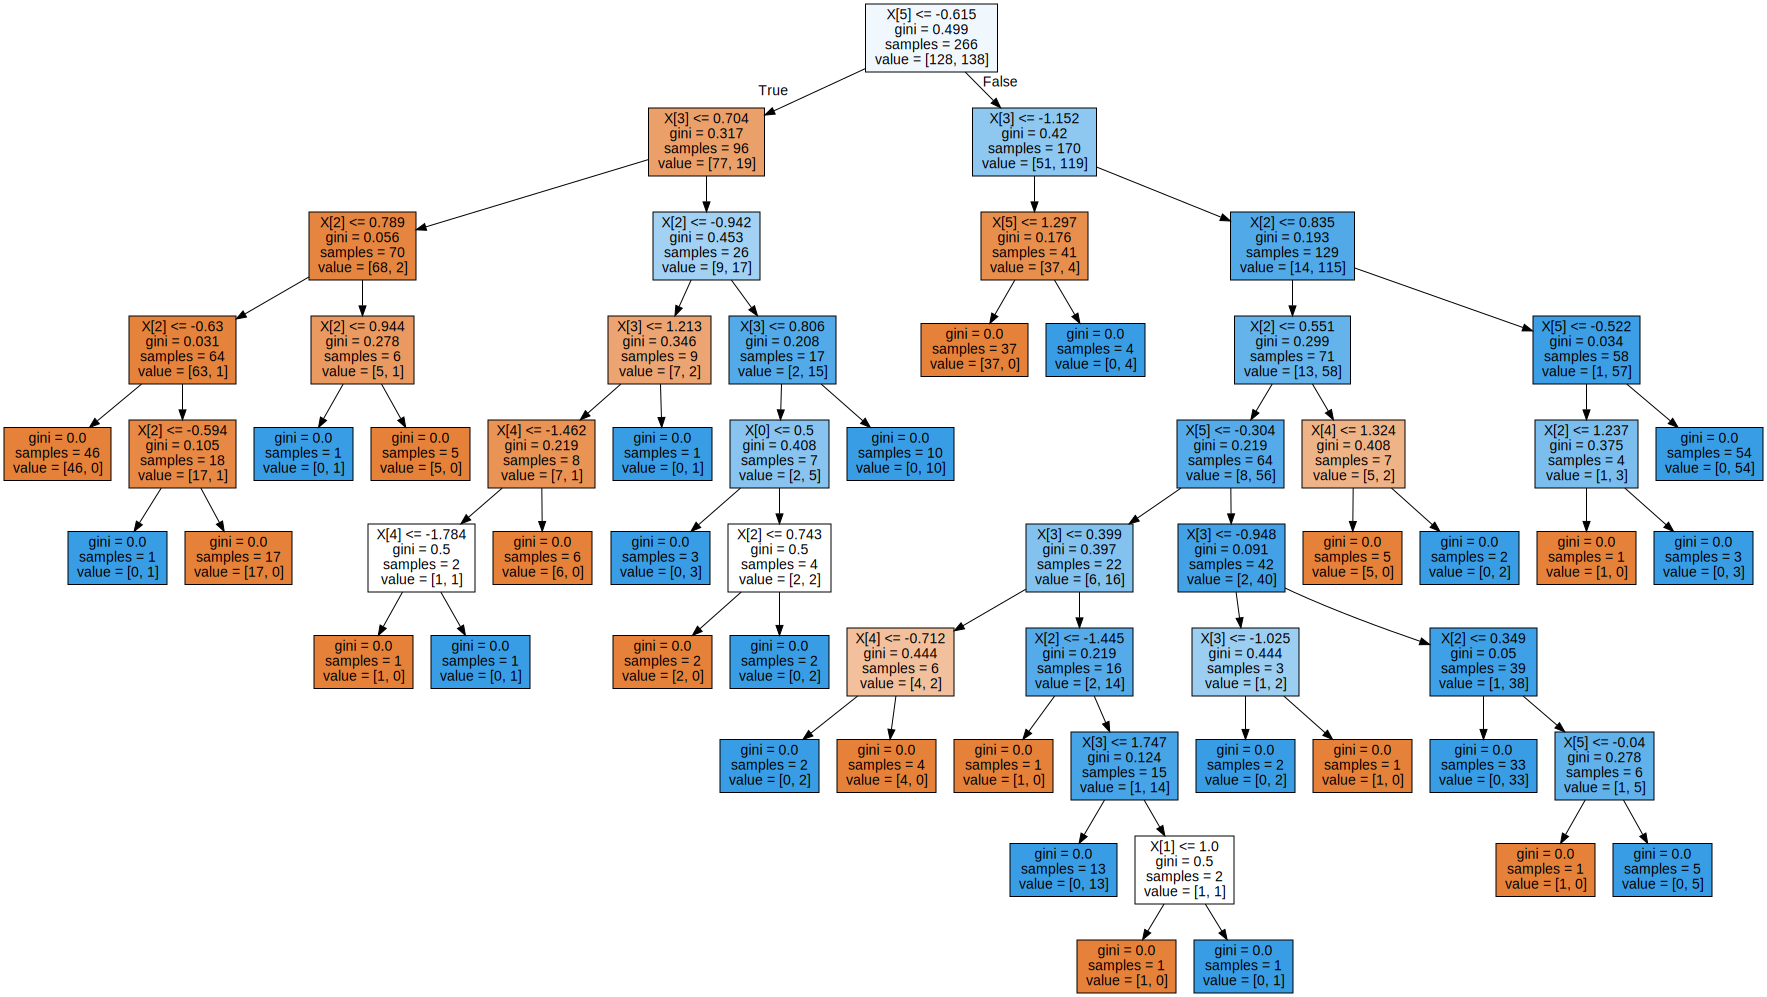

In [43]:
# 학습된 나무 시각화
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtc_model, filled = True)
graphviz.Source(dot_data)

3. [DT]예측

In [44]:
predictions = dtc_model.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0])

In [45]:
# 평가
dtc_acc = accuracy_score(Y_test, predictions)
print('Decision Tree 모델의 예측 정확도는 {}%입니다.'.format(round(dtc_acc*100)))

Decision Tree 모델의 예측 정확도는 85%입니다.


> ### 서포트 백터 분류기(SVC)
> - 서포트 벡터 분류기(Support Vector Classifier)이란 두 데이터 그룹으로부터 최대한 떨어져 있는 초평면(Optimal Hyperplane)을 구하고, 이것을 사용하는 이진 분류 모델이다.
> - 서포트 벡터는 이 초평면을 결정하기 위해 사용되는 데이터 집합
> - 분류나 예측 문제에 동시에 사용한다.
> - 데이터가 많으면 예측의 정확도가 비교적 높아진다.

1.[SVC]모델 정의

In [46]:
from sklearn.svm import SVC
svc_model = SVC()

In [47]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

2. [SVC]모델 학습

In [48]:
svc_model.fit(X_train, Y_train)

SVC()

2. [SVC]예측

In [49]:
predictions = svc_model.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1])

In [50]:
svc_acc = accuracy_score(Y_test, predictions)
print('Support Vector Classifier 모델의 예측 정확도는 {}%입니다.'.format(round(svc_acc*100)))

Support Vector Classifier 모델의 예측 정확도는 90%입니다.


- 분류 모델별 예측 정확도

In [51]:
accuracy_table = pd.DataFrame({'Logistic Regreesion' : [str(round(lr_acc*100))+ '%'],
                               'KNeighbors' : [str(round(knc_acc*100)) + '%'],
                               'Decision Tree' : [str(round(dtc_acc*100)) + '%'],
                               'SVV' : [str(round(svc_acc*100)) + '%']})
accuracy_table
# 자료마다 분석 알고리즘의 정확도가 다르다.

,Logistic Regreesion,KNeighbors,Decision Tree,SVV
0,87%,96%,85%,90%


## 분류 성능 평가하기
> - **정확도(Accuraacy)**이외에 scikit-learn이 제공하는 다양한 성능을 평가하기 위한 방법 사용

정확도 하나만으로 **'이 머신 러닝 모델은 성능이 좋은 모델이다!'** 라고 말 할 수없다.<br>
만약 90%펭귄이 수컷인 상황이라면 모두 수컷이라고 예측을 하면 정확도는 90%이다.<br> 따라서 모델의 정확도만을 가지고 분류 성능을 평가하는 것은 주의가 필요하다.

### 오차행렬
> - 분류를 하면서 **모데링 얼마나 헷갈리고 있는지**를 한눈에 파악할 수있다.
> - 실제 값 종류 별로 얼마나 맞추었는지, 아니면 얼마나 틀렸는지를 알 수 있어, **예측 오류의 종류 별로 분석**이 가능합니다.

> 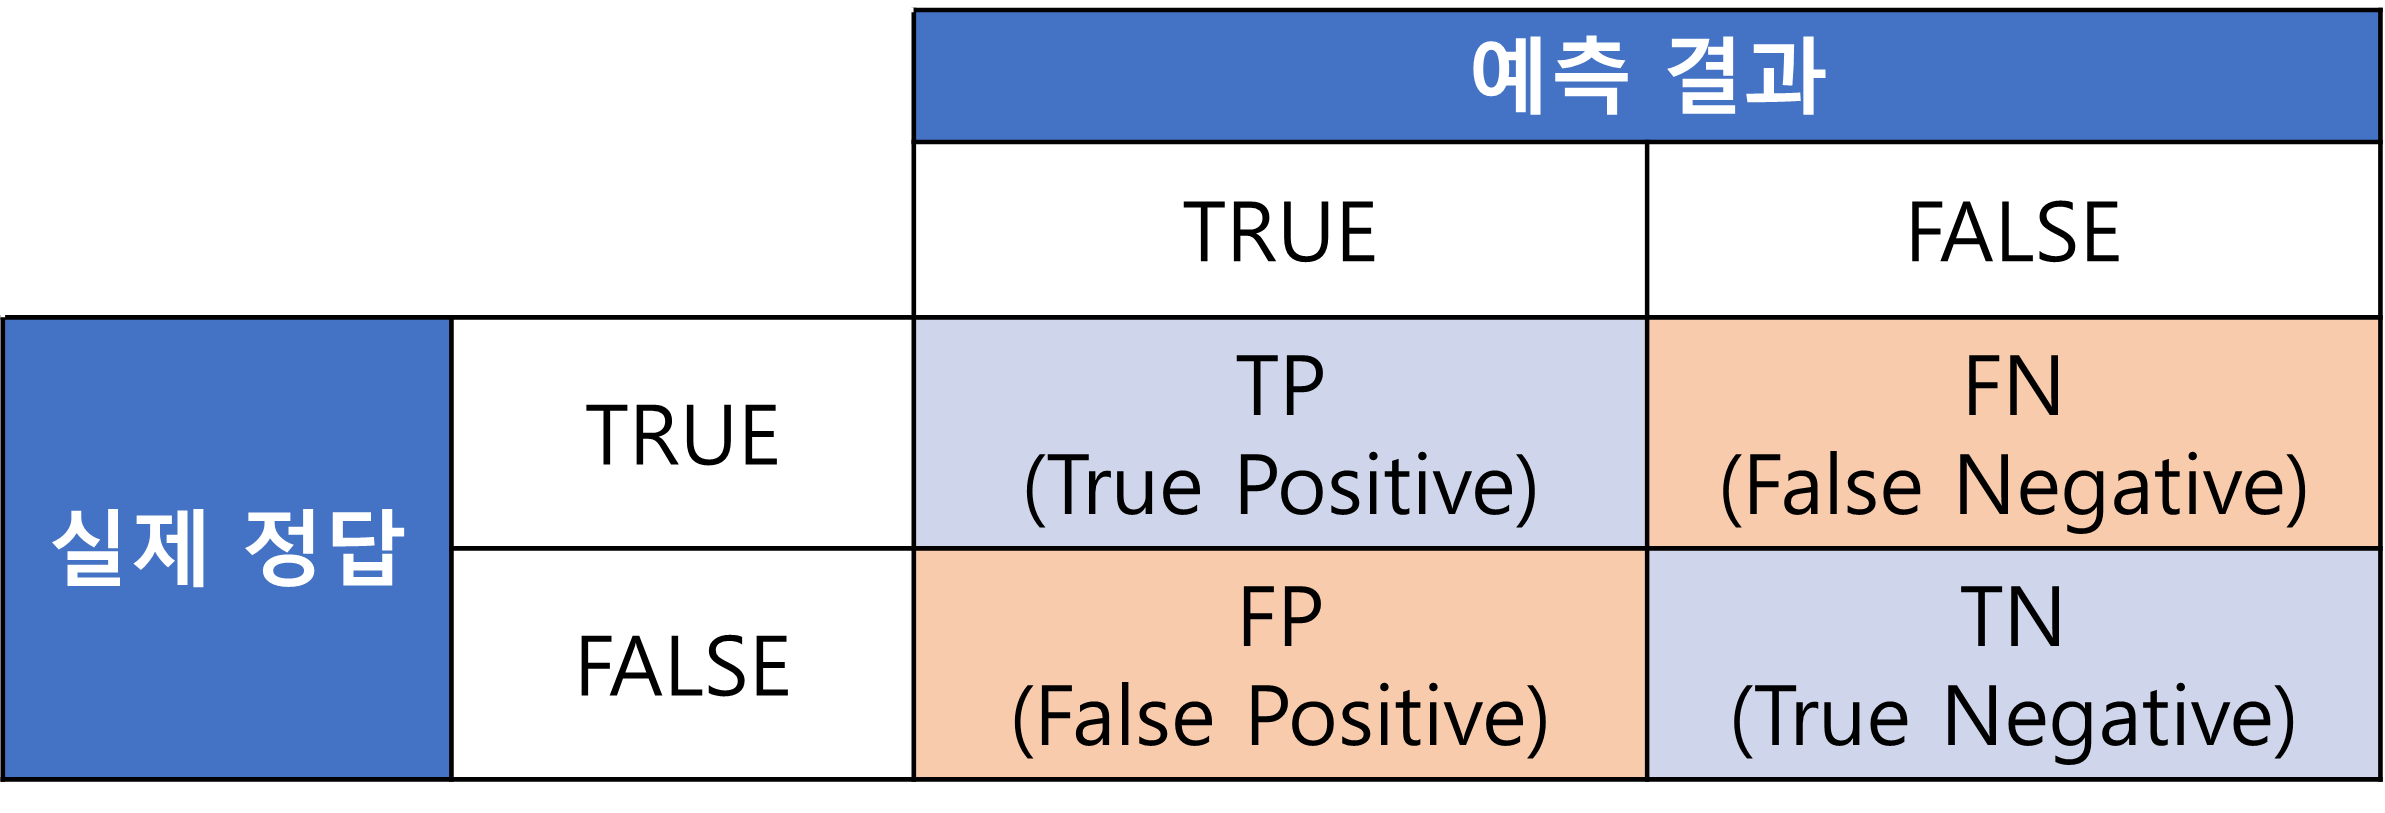

In [52]:
# 라이브러리 import
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [53]:
predictions = lr_model.predict(X_test)

In [54]:
# confusion matrix
cnf_matrix = confusion_matrix(Y_test, predictions)

In [55]:
cnf_matrix

array([[29,  8],
       [ 1, 29]])

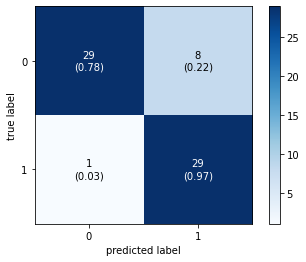

In [56]:
# Confusioin Matrix 시각화 하기
figure, ax = plot_confusion_matrix(conf_mat = cnf_matrix, # confusion atrix
                                   show_absolute = True, # 절대값 보여주기
                                   show_normed = True, # 비율 보여주기
                                   colorbar = True)

plt.show()

> ### 정확도(Accuracy)/ 정밀도(Precision)
> - 정확도와 정밀도는 항상 헷갈리지만, 함께 봐야하는 중요한 지표 중 하나이다.
> - scikit-learn에선 0-1 사이 값으로 계산해 줍니다.
> - **정확도(Accuracy)** :'전체 분류 결과 중' 에서 '실제 참으로 맞춘 비율'
    - 전체 데이터에서 얼마나 맞췄냐?
    - TP + TN / TP + FP + TN + FN
> - 정밀도(precision) : '참으로 분류한 것 중'에 '실제 참의 비율'
    - 얼마나 정밀하게 참으로 분류했는가?
    - TP/TP + FP

In [57]:
# libary import
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [58]:
#정확도
accuracy_score(Y_test, predictions)

0.8656716417910447

In [59]:
#정밀도
precision_score(Y_test, predictions)

0.7837837837837838

> ### 재현율(Recall)
> - 재현율(Recall)은 Hit Ratio등으로 불리는 지표이다.
> - 정밀도와 개념이 유사하지만, 다른 점은 분모 부분이 '실제 참 값'이 들어간다.
> - sckit-learn에선 0-1 사이 값으로 계산
> - 재현율(Recall) : '**실제**참값 중에서 '참으로 분류한 비율'
    - 참 값을 얼마나 잘 재현 했는가?
    - TP / TP + FN

In [60]:
# libary import
from sklearn.metrics import recall_score

In [61]:
recall_score(Y_test, predictions)

0.9666666666666667

> ### F1점수 (F1-score)
> - F1-score는 재현율과 정밀도가 한쪽으로 치우치지 않았는지 나타내는 지표이다.
> - 재현율과 정밀도는 한쪽이 높아지면, 다른 한쪽은 낮아지는 관계(Trade-off관계)가 있습니다. 만약 정밀도를 높이려 하면 재현율이 낮아집니다.
> - 주로 **데이터가 심각한 불균형 상태일 때** 성능 평가를 제대로 하기 위해서 사용
> - F1점수(Recall): '데이터 불균형을 보정한 분류 성능'
    - 데이터가 불균형을 보장한 분류 성능
    - 2 * Precision(정밀도) * Recall/ precision+Recall

In [62]:
# libary import
from sklearn.metrics import f1_score

In [63]:
f1_score(Y_test, predictions)

0.8656716417910447

> ### **ROC(Receiver Operator Characteristic)커브**
> - ROC 커브는 분류 모델의 판단 기준을 연속적으로 바꾸면서 성능에 어떤 변화가 있는지 측정하는 방법입니다.
> - TPR(True Postive Rate): 참 값에 대해 참으로 바로 예측하는 비율
    - TP/TP+FN
> - FPr(False Postive Rate): 거짓 값에 대해 참으로 틀리게 예측하는 비율
    - FP/FP + TN
> - 커브 아래 면적을 AUC(Area under the ROC curve)라고 한다.
> - 이 AUC 면적이 클수록 성능이 좋은 모델이다.

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

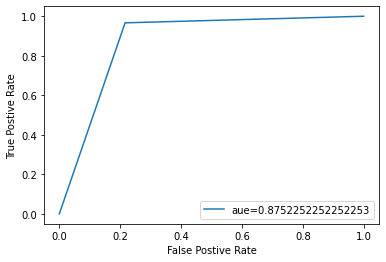

In [65]:
# roc 커브 시각화
fpr, tpr, _ = roc_curve(Y_test, predictions)
auc = roc_auc_score(Y_test, predictions)
plt.plot(fpr,tpr, label='aue='+str(auc))
plt.legend(loc='lower right')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.show()

In [66]:
# 전체 분류 모델 성능 지표
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1_score = f1_score(Y_test, predictions)
auc_score = roc_auc_score(Y_test, predictions)

print("accuracy: {}".format(round(accuracy, 2)))
print("precision: {}".format(round(precision, 2)))
print("recall: {}".format(round(recall), 2))
print("f1_score: {}".format(round(f1_score, 2)))
print("auc_score: {}".format(round(auc_score, 2)))

accuracy: 0.87
precision: 0.78
recall: 1
f1_score: 0.87
auc_score: 0.88


> ## 회귀 분석 모델링
- **`수치형`** 데이터를 예측하기 위한 대표적인 지도 학습(Supervised Learning) 방법론인 **회귀 분석**

> ### 회귀 분석(Regression Analysis)이란?
- 회귀 분석은 데이터로부터 변수들 간의 함수 관게를 찾아내는 방법이다.
- 과거 **수치형** 데이터로 부터 함수관계를아 찾아내고, 미래 수치형 데이터를 예측한다.
- 부동산 가격 예측, 고객 수요 예측, 원재료 가격에 예측 다양한 문제를 해결 한다.
- 과거 데이터 패턴을 학습하는 방법이기 때문에, 변동성이 심한 문제는 모델 성능이 떨어질 수 있다.

> ### 선형 회귀(Linear Regression)
- 선형 회귀란 **변수들 사이의 선형적(직선적인)함수 관계를 모델링하는 방법**
- 데이터를 바탕으로 **변수 관계를 설명하는 일차 방정식 함수**를 만들어 낸다.
    - `Y= WX + b(W:기울기, b :y절편)`
    - 학습 방법은 경사 하강법 알고리증 사용
- 학습을 통해 제일 합리적인 선을 찾아내는 것
- 만약 `변수들의 상관관계가 없다면` 합리적인 선을 `찾아내지 못할 수 있다.`


> 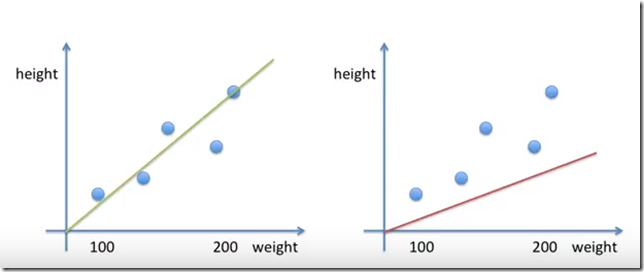

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
# 샘플 데이터 생성
df = pd.DataFrame({'height': [160, 180, 170, 150, 175, 165, 185, 155, 140, 190],
                   'weight': [48, 75, 73, 45, 75, 55, 78, 53, 40, 85]})

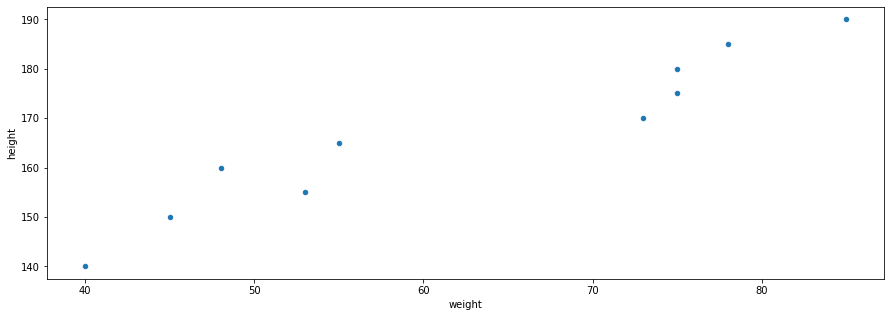

In [69]:
# 시각화
df.plot.scatter(x='weight', y='height',figsize=(15,5))

In [70]:
lr_model = LinearRegression()
# lr_model.fit(df['weight'], df['height'])
# LinearRRegression()의 X값은 array 값으로 입력

In [71]:
df['weight'] # series 형태 

0    48
1    75
2    73
3    45
4    75
5    55
6    78
7    53
8    40
9    85
Name: weight, dtype: int64

In [72]:
df['weight'].values.reshape(-1,1)
# 2차 배열 변경

array([[48],
       [75],
       [73],
       [45],
       [75],
       [55],
       [78],
       [53],
       [40],
       [85]])

In [73]:
lr_model.fit(df['weight'].values.reshape(-1,1), df['height'])

LinearRegression()

In [74]:
# 기울기 (W)
lr_model.coef_

array([0.95205509])

In [75]:
# y절평 (b)
lr_model.intercept_

107.30614601599589

In [76]:
x = np.linspace(40, 90, 50)
y = lr_model.coef_[0]*x + lr_model.intercept_ # Y = W*X + b
y

array([145.38834951, 146.3598343 , 147.33131908, 148.30280386,
       149.27428865, 150.24577343, 151.21725821, 152.188743  ,
       153.16022778, 154.13171256, 155.10319735, 156.07468213,
       157.04616691, 158.0176517 , 158.98913648, 159.96062126,
       160.93210604, 161.90359083, 162.87507561, 163.84656039,
       164.81804518, 165.78952996, 166.76101474, 167.73249953,
       168.70398431, 169.67546909, 170.64695388, 171.61843866,
       172.58992344, 173.56140823, 174.53289301, 175.50437779,
       176.47586257, 177.44734736, 178.41883214, 179.39031692,
       180.36180171, 181.33328649, 182.30477127, 183.27625606,
       184.24774084, 185.21922562, 186.19071041, 187.16219519,
       188.13367997, 189.10516476, 190.07664954, 191.04813432,
       192.0196191 , 192.99110389])

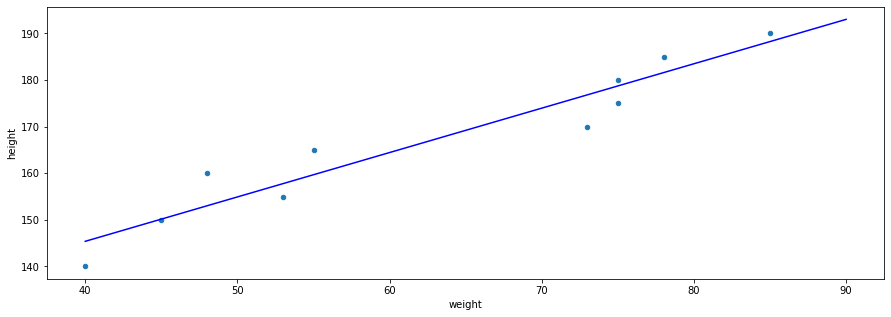

In [77]:
# 선형 회귀 선 시각화
df.plot.scatter(x='weight', y='height', figsize=(15,5))
plt.plot(x,y, c='blue')
plt.show()

> ### 다중 선형 회귀(multi-Linear Regreesion)
- 다중 선형 회귀랑 변수(X)가 여러개인 회귀 분석
    - Y=W1X1 + W2X2 + W3X3 +...+ b
- 대부분의 **실제 문제는 변수가 하나 이상** 이기 때문에, 다중 선형 회귀가 많이 활용된다.
- 일반적으로 선형 회귀 분석에서는 자동적으로 함수를 찾아주기 때문에 **정규화/표준화 과정이** 필요 없다.

> 실습 데이터 세트(캘리포니아 주택 가격 정보)
> - [scikit-learn 제공 데이터 세트 목록](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets)

In [78]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
cal_house_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
cal_house_df['Price($)'] = dataset.target * 100000

In [79]:
cal_house_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price($)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


In [80]:
from sklearn.model_selection import train_test_split

X = cal_house_df.drop('Price($)', axis=1)
Y = cal_house_df['Price($)']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, shuffle=True)

In [81]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4013,6.0794,32.0,6.337559,1.057052,1628.0,2.580032,34.16,-118.60
13298,3.4950,35.0,4.956522,0.952569,729.0,2.881423,34.08,-117.64
12700,3.4784,36.0,4.974318,0.971108,1322.0,2.121990,38.61,-121.41
19622,4.0000,36.0,6.000000,1.500000,27.0,3.375000,37.33,-121.29
17033,2.7075,29.0,3.612683,1.048780,1611.0,1.571707,37.51,-122.26
...,...,...,...,...,...,...,...,...
955,8.3337,24.0,7.915000,1.060000,1081.0,2.702500,37.66,-121.93
10272,3.0227,16.0,4.515254,1.247458,1534.0,5.200000,33.87,-117.87
2759,2.6250,11.0,4.943201,1.049914,2644.0,4.550775,32.68,-115.51
6780,3.4559,39.0,4.645783,1.044578,1847.0,2.225301,34.10,-118.15


In [82]:
Y_train

4013     338500.0
13298    118000.0
12700    105500.0
19622     75000.0
17033    323800.0
           ...   
955      500001.0
10272    297100.0
2759      72700.0
6780     364900.0
7646     165300.0
Name: Price($), Length: 20433, dtype: float64

In [83]:
# 다중선형 회귀 모델 정의/학습
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)

LinearRegression()

In [84]:
predictions = mlr_model.predict(X_test)
predictions

array([301926.55177474, 309627.71682013, 204444.48411111, 256304.21607944,
       168950.67887886, 186704.66587465, 263477.04511652, 178654.70541182,
       181322.71539418, 208705.58959417, 146214.23796222, 172323.76573674,
       248661.00892671, 339512.57020343, 259185.21523531, 254086.41900567,
       179672.66980298, 127289.11824812, 223750.34472278, 221256.28872418,
        96046.46340945, 229445.77771126, 186128.65463722, 216838.00680866,
       223951.63592515, 172458.96654045, 365404.31622502, 158680.37187352,
       199164.17600423, 178641.44302581, 243428.45026029, 251493.52919549,
       293782.96598792, 236973.60265587, 178295.09672667, 298358.30030917,
       315374.19977667, 100922.47289937, 247238.4365594 ,  55142.73030974,
       248123.33430209, 241302.43566539, 274074.2974666 , 120347.63479421,
       186312.41279771, -83432.58749436, 121017.53431884, 160834.83876985,
       147115.70566768, 268128.3245374 , 195809.83593272, 276896.98108359,
       210362.14767765, 4

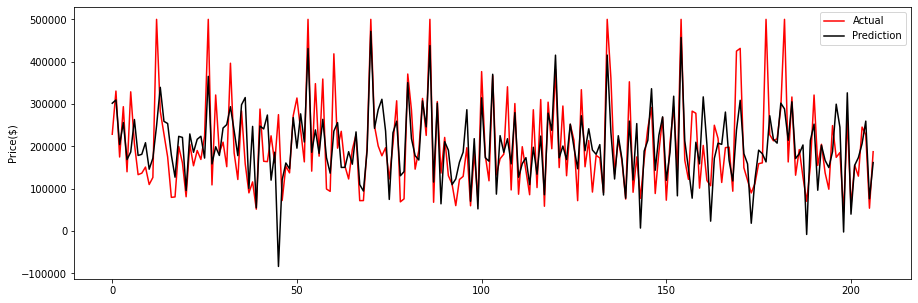

In [85]:
# 예측 시각화
Y_test = Y_test.reset_index(drop=True)

plt.figure(figsize=(15,5))
plt.plot(Y_test, label='Actual', color='red')
plt.plot(predictions, label='Prediction', color='black')
plt.legend(loc='upper right')
plt.ylabel('Price($)')
plt.show()

> ## 회귀 성능 평가하기
- **회귀 모델이 얼마나 잘 학습되있는지 평가하는 방법**
- scikit-learn에서는 다양한 회귀 성능 평가 좌표를 제공한다.

> ### MAE(Mean Absolute Error)
> $$ MAE = \frac{\sum\vert y-\hat{y} \vert}{n}$$
- MAE는 **실제 값과 예측값의 차이의 전페 평균** 입니다.(낮을 수록 좋은 지표)
- 절대 값을 나타내기 때문에 가장 **직관적**으로 오차를 알수 있다.


> 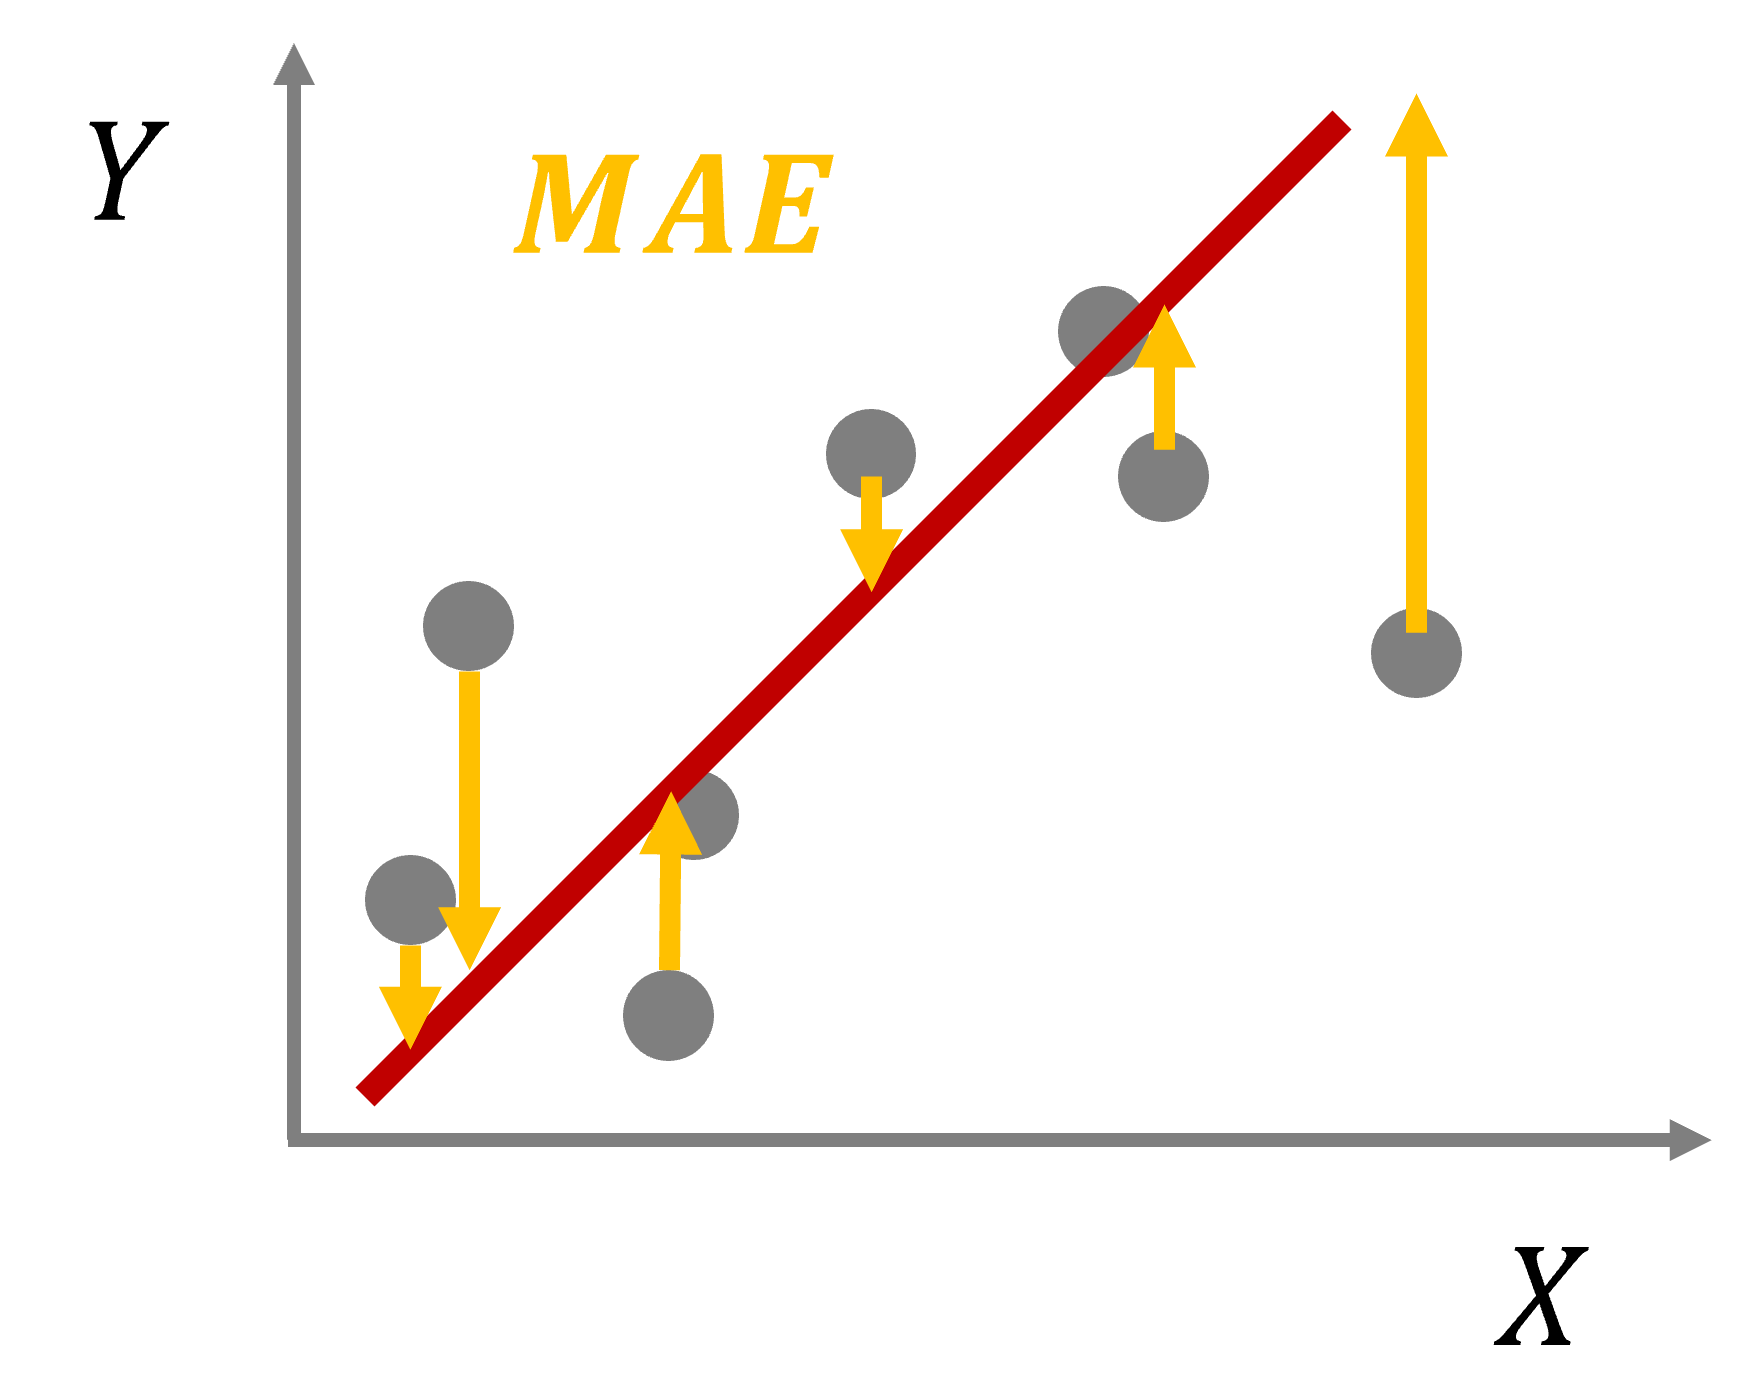

In [86]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, predictions)

In [87]:
mae

54034.538996610536

> ### MSE(Mean Squared Error)/ RMSE(Root Mean Squared Error)
> $$ MSE = \frac{\sum(y-\hat{y})^2}{n}$$
> $$ RMSE = \sqrt\frac{\sum(y-\hat{y})^2}{n}$$

- MSE는 실제값과 예측값의 차이를 제곱하기 때문에, 차이의 **면적**을 표현한다.
- 즉, 예측값의 차이가 많이 나면 기하급수적으로 오차가 커집니다.
- RMSE 는 MSE에 루트(root)를 씌운 지표로, MSE 수치 보다 좀더 직관적으로 확인이 가능하다.

> 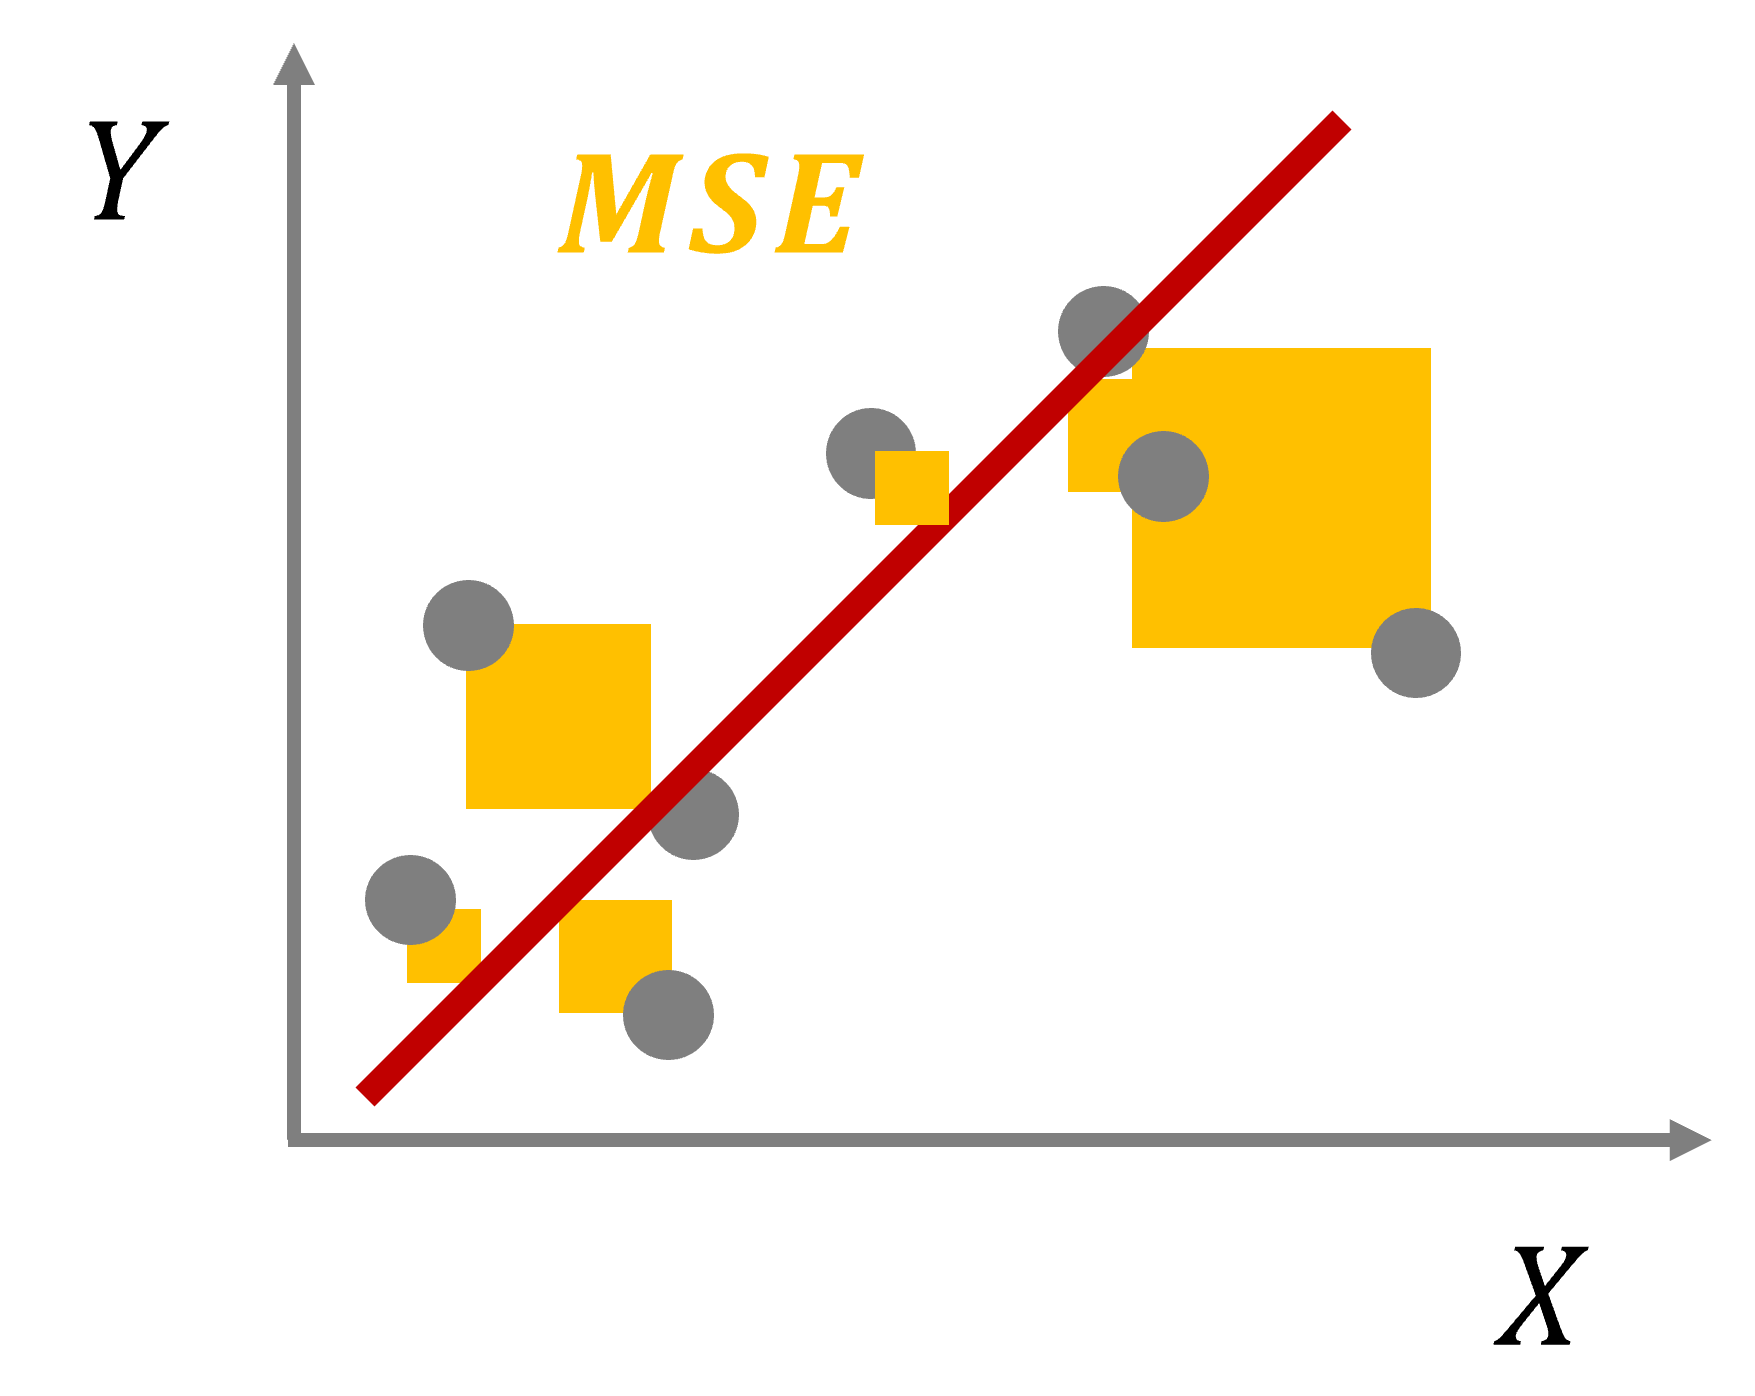

In [88]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predictions)

In [89]:
mse

5479169271.819255

In [90]:
rmse = mse ** 0.5 
# 0.5 제곱 = 루트
rmse

74021.41090130109

> ### **R-squared(R<sup>2</sup>)**
> $$ R^2 = \frac{SSE}{SST}$$
> $$ SSE = \sum(\hat{y}-\bar{y})^2$$
> $$ SST = \sum(y-\bar{y})^2$$

- R-squared는 **회귀선이 실제 값에 얼마나 잘 적합되있는가?** 를 나타내는 지표입니다.
- 실제 값과 실제 값 평균까지 거리를 계산한 뒤, 예측 값과 비교하는 과정
- 0-1 사이의 값을 나타내며, **높을 수록 적합이 잘 되었다** 는 의미이다.
- 즉, 회귀 선이 실제 값을 얼마나 잘 설명하는 선인가? 의미이다.

In [91]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, predictions)

In [92]:
r2

0.5153818426915608

> ### Adjusted R-squared(R<sub>adj</sub><sup>2</sup>) V-difficult
> $$ R~adj^2 = 1-(1-R^2)\frac{n-1}{n-p-1}$$
- 일반적으로 **회귀 모형의 적합도(R<sup>2</sup>)는 학습 변수가 많아질수록 높아지는 경향**이 있다.
- 너무 적합도과 높다면 **과적합**이 될수 있다.
- **과적합(Overfitting)** 또는 **과소 적합(Underfitting)**은 머신 러닝에서 자주 등장하는 개념이다. 학습 모델이 적당한 적합도를 갖게 만드는 것이 매우매우 중요!!!!
- 수정된 적합도(Adjusted R-squared)는 이런 **과적합 현상을 판단하기 위한 지표**입니다.
- 학습에 사용된 변수 만큼 Penalty를 부과해서, 적합도를 수정해줍시다.
- 만약 **적합도(R<sup>2</sup>가 높은데, 수정 된 적합도(R<sub>adj</sub><sup2></sup>)가 현저하게 낮다면, 학습 모델이 과적합** 되었다고 판단한다.

> 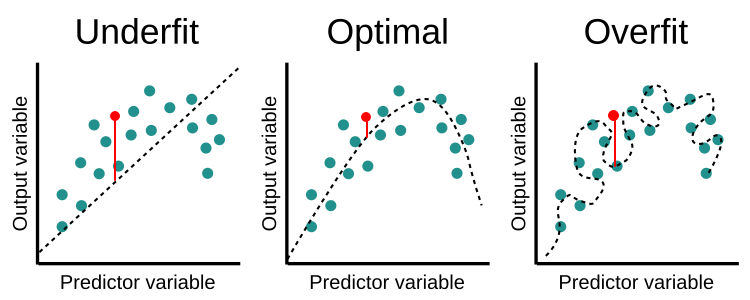

In [93]:
# adjusted R-squared
adj_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / ( len(Y_test) - X_test.shape[1] - 1 )

In [94]:
adj_r2

0.4958013110831391

> **전체 회귀 모델 성능 지표** 텍스트

In [95]:
print('MAE: {}'.format(round(mae,2)))
print('MSE : {}'.format(round(mse,2)))
print('RMSE : {}'.format(round(rmse),2))
print('R2 : {}'.format(round(r2, 2)))
print('adj_R2 : {}'.format(round(adj_r2, 2)))

MAE: 54034.54
MSE : 5479169271.82
RMSE : 74021
R2 : 0.52
adj_R2 : 0.5


> ## 앙상블(Emsemble)모델링
> #### 앙상블 학습이란?
> - **여러개의 머신 러닝 모델을 결합함**으로써 보다 **정확한 예측**을 할 수 있게 해주는 방법을 말합니다.
> - 강력한 하나의 모델을 사용하는 대신, 보다 약한 모델 여러를 조합해 더 정확한 예측을 할 수 있게 해준다.
> - ex) 어려운 문제를 해결할때 **한명의 전문가 보다, 여러명의 집단 지성을 이용**하면 더 손쉽게 문제를 풀 수 있는 개념을 사용한 기법이다.
> - 앙상블 모델링은 일반적으로 **베걍(Bagging)**, 과 **부스팅(Boosting)**방법이 대표적 이다.
> - **배깅(Bagging)**: 데이터 샘플링을 통해 여러 모델을 학습한 후, 결과를 집계하는 방법
    - 모두 같은 알고리즘으로 구성
    - 과적합(Overfitting)방지에 효과적
    - 대표 알고리즘 : 랜덤포레스트(randomForest)
> - **부스팅(Boosting)** : 여러 모델이 순차적으로 이전 오차를 줄이는 방향으로 학습을 진행
    - 이전 모델이 틀린 데이터에 대해 올바르게 예측할 수 있도록 다음 모델에 가중치(weight)를 부여하는 방식
    - 예측 성능이 뛰어나, 앙상블 학습에서 가장 각곽받는 방식
    - 속도가 비교적 느리다.
    - 대표 알고리즘 : **XGBoost, LightGBM**

> ### **Random Forest**
> - 랜덤 포레스트(Random Forest사는 **의사 결정 나무(Decision Tree)성능을 보다 개선**시키기 위해, **여러개의 나무**를 만들어서 **각 나무들의 예측 결과를 조합**해 최종 결정을 내리는 대표적인 **배깅(Bagging)** 알고리즘이다.
> - 성능이 우수해서 현재까지도 **실제 문제에서 가장 널리 사용**되는 인기 알고리즘입니다.
> - **Random Forest 특징**
    - 각 나무마다 랜덤하게 데이터를 샘플링(복원추출) : 각 나무마다 훈련하는 데이터가 다름
    - 다수의 나무가 결정한 값으로 (다수결)최종 결정을 내림
    - 나무 개수가 많을 수록 정확도는 개선되지만, 일정 지점이 넘으면 급격히 정확도 하락(대이터 규모와 성격에 맞게 지정 필요)
    - 분류/회귀 문제 모두 적용 가능

> 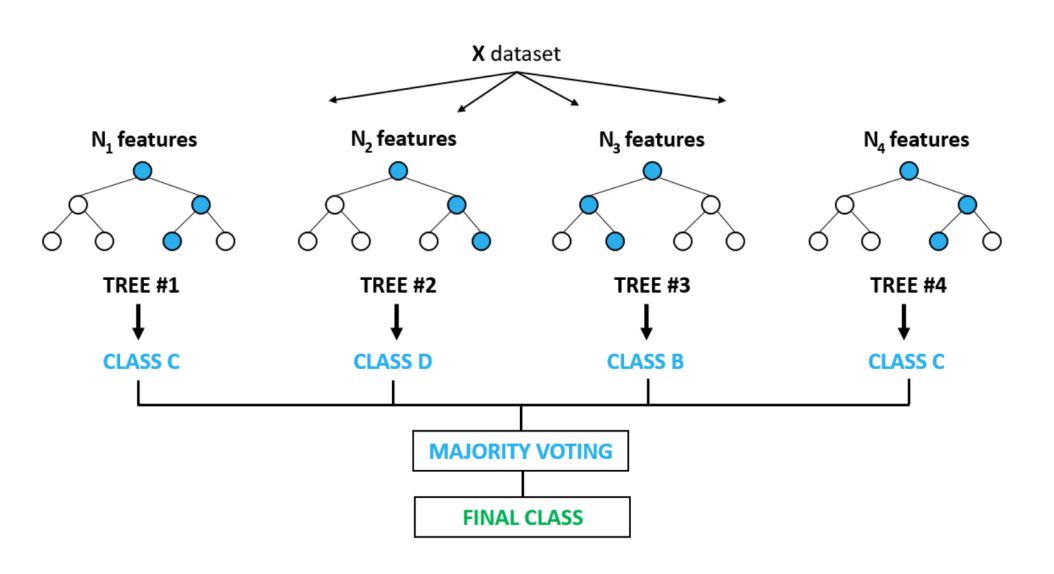

In [96]:
from sklearn.ensemble import RandomForestRegressor
# 분류 문제 : RandomForestClassifier

In [97]:
# 학습 정의
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [98]:
# 예측 결과 확인
predictions = rf_model.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print('MAE : {}'.format(round(mae,2)))
print('MSE : {}'.format(round(mse, 2)))
print('RMSE : {}'.format(round(rmse), 2))
print('R2 : {}'.format(round(r2, 2)))
print('adj_R2: {}'.format(round(adj_r2, 2)))

MAE : 31334.19
MSE : 2302747618.53
RMSE : 47987
R2 : 0.8
adj_R2: 0.79


> ### XGBoost
> - XGBoost 는 Extreme Gradient Boosting의 약자입니다. **앙상블 부스팅(Boosting)** 기법 중 대표적인 알고리즘이며, 성능이 좋고, 속도가 빠른 장점이 있습니다.
> - **XGBoost**
    - 나무 분기를 균형 있게 해 나가는 방식이다.
    - 다양한 옵션으로 커스터마이징이 뛰어나다.
    - 조기 종료(Early Shopping) 기능 제공
    - 분류/ 회귀 문제 모두 적용 가능

> 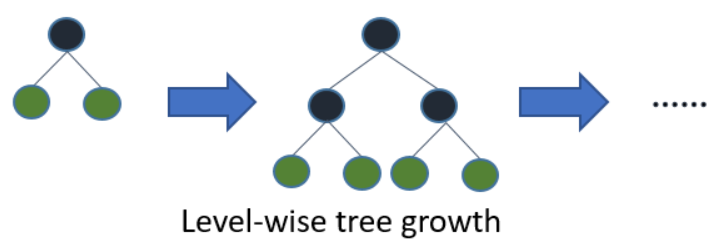

In [99]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [100]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

[05:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

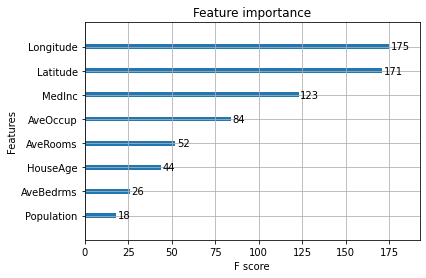

In [101]:
# 변수 중요도(feature importance)
plot_importance(xgb_model)

In [102]:
predictions = xgb_model.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1-( 1 - r2) * ( len(Y_test) - 1)  / ( len(Y_test) - X_test.shape[1] - 1)

print('MAE : {}'.format(round(mae, 2)))
print('MSE : {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(rmse), 2))
print('R2: {}'.format(round(r2, 2)))
print('adj_r2: {}'.format(round(adj_r2, 2)))

MAE : 35466.82
MSE : 2353503821.7
RMSE: 48513
R2: 0.79
adj_r2: 0.78


> ### **LightGBM**
> - LightGBM 은 XGBoost 와 맟찬가지로 대표적인 부스팅(Boosting)방법 중에 하나이다.
> - XGBoost와 다른 점은, 나무 분기 방식이 균형적으로 되는 것이 아니라, **많이 틀린 leaf 쪽으로 분기되어** 나가는 성격을 가지고 있다.
> - **LightGBM 특징**
    - 나무 분기를 불균형하게 해 나가는 방식이다.(최대 손실을 줄이기 위한 방향으로)
    - 학습 시간이 매우 빠르다.
    - 적은 dataset을 사용할 경우 과적합 가능성이 크다.(10,000개 이상 데이터 권장)
    - 분류/회귀 문제 모두 적용 가능

> 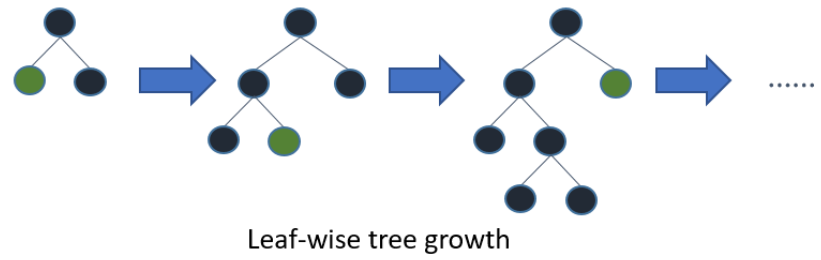

In [103]:
from lightgbm import LGBMRegressor

In [104]:
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, Y_train)

LGBMRegressor()

In [105]:
predictions = lgbm_model.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 31423.44
MSE: 2029566219.14
RMSE: 45051
R2: 0.82
adj_R2: 0.81


> 앙상블 모델간 성능 비교

In [106]:
mae, mse, rmse, r2, adj_r2 = [], [], [], [], []

for model in [mlr_model, rf_model, xgb_model, lgbm_model]:
    predictions = model.predict(X_test)
    mae.append(mean_absolute_error(Y_test, predictions))
    mse.append(mean_squared_error(Y_test, predictions))
    rmse.append(mse[-1] ** 0.5)
    r2.append(r2_score(Y_test, predictions))
    adj_r2.append(1 - ( 1 - r2[-1 ] * ( len(Y_test) - 1) / ( len(Y_test) - X_test.shape[1] - 1)))

perf_df = pd.DataFrame({'model' : ['MLR(Default)', 'RandomForest', ' XGBoost', 'LightGBM'],
                        'MAE' : mae,
                        'MSE' : mse,
                        'RMSE' : rmse,
                        'R2' : r2,
                        'adj_r2' : adj_r2})

In [107]:
perf_df

,model,MAE,MSE,RMSE,R2,adj_r2
0,MLR(Default),54034.538997,5.479169e+09,74021.410901,0.515382,0.536205
1,RandomForest,31334.188357,2.302748e+09,47986.952586,0.796328,0.828503
2,XGBoost,35466.821973,2.353504e+09,48512.924275,0.791839,0.823832
3,LightGBM,31423.444323,2.029566e+09,45050.707199,0.820490,0.853641


Text(0.5, 1.0, 'R2')

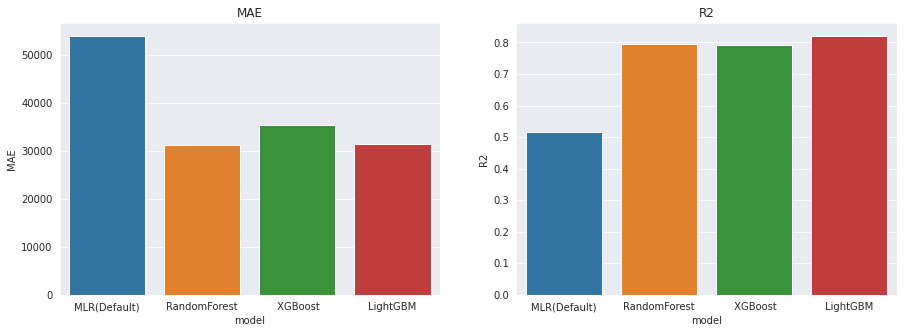

In [108]:
# 앙상블 모델 시각화
sns.set_style('darkgrid')
flg, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=perf_df, x='model', y='MAE', ax =axes[0])
axes[0].set_title('MAE')

sns.barplot(data=perf_df, x='model', y='R2', ax = axes[1])
axes[1].set_title('R2')

> ## 하이퍼 파라미터(hyper-parameter)튜닝
> #### 하이퍼 파라미터 튜닝이란?
> - 머신 러닝에서 하이퍼 파라미터란 **사용자가 학습 모델에 설정 가능한 옵션**이라고 한다.
> - 모든 데이터와 문제에서 가장 좋은 하이퍼 파라미터가 정해져 있으면 좋겠지만 그렇지 않다.
> - **데이터의 성격, 종류**에 따라 적절한 **하이퍼 파라미터는 모두 다르다.**
> - 수동으로 적절한 하이퍼 파라미터를 찾는 작업은 매우 지루하고 시간이 오래 걸린다.
> - scikit-learn 에서는 두가지 자동화 탐색 기능을 제공한다.
    - **GridSearchCV(그리드 탐색**
    - **RandomizedSearchCV(랜덤탐색)

> ## GridSearchCV
> - GridSearchCV 방식은 **사전에 지정된 하이퍼 파라미터 값**들을 그리드(격자)형식으로 모두 탐색하면서 최적 성능 조합을 만들어 준다.
> - 사용방법
    - `GridSearchCV(모델명, 하이퍼파라미터 그리드(dict), cv=성능 비교할 분할 데이터 수, scoring=평가 방법)`
    

[LightGBM 공식문서](https://lightgbm.readthedocs.io/en/latest/Parameters.html) <br>
- 핵심 파라미터
    - `learning_rate` : 학습률(틀린 값에 대한 가중치를 얼마나 줄 것인가)
    - `num_leaves` : 전체 나무의 잎(leave) 수
    - `min_child_sample` : 나뭇잎에 계산되는 최소 데이터 수
    - `n_estimators` : 부스팅(학습 반복) 횟수

In [109]:
# 하이퍼 파라미터 목록
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [110]:
# 튜닝할 하이퍼 파라미터 목록 만들기
# list 안에 있는 데이터를 다 사용한다.
# 데이터양 많아지면 그만큼 오래 걸린다.
# 형식은 key : value 딕셔너리 형식이다.
param_grid = {'lerning_rate' : [0.05, 0.1],
              'num_leaves' : [31, 50],
              'min_cild_samples' : [50],
              'n_estimators' : [100, 300]}

In [111]:
# 라이브러리 로딩
from sklearn.model_selection import GridSearchCV

In [112]:
# 그리드 탐색 실행
grid_search = GridSearchCV(lgbm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'lerning_rate': [0.05, 0.1], 'min_cild_samples': [50],
                         'n_estimators': [100, 300], 'num_leaves': [31, 50]},
             scoring='neg_mean_squared_error')

In [114]:
# 최적 파라미터 확인
grid_search.best_params_

{'lerning_rate': 0.05,
 'min_cild_samples': 50,
 'n_estimators': 300,
 'num_leaves': 50}

In [115]:
# 최적 파라미터로 성능 확인
lgbm_model_gradCV = LGBMRegressor(learning_rate = 0.05, min_child_samples=50, n_estimators=300, num_leaves=50)
lgbm_model_gradCV.fit(X_train, Y_train)

predictions = lgbm_model_gradCV.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 29320.83
MSE: 1929056479.96
RMSE: 43921
R2: 0.83
adj_R2: 0.82


> ## **RandomizedSearchCV**
> - **GridSearchCV방식**은 **비교적 적은 수의 조합을 탐색할 때 좋습니다.** 하지만 하이라파라미터 공간이 커지면 이전 방식은 모든 조합을 탐색하기 때문에, 너무 오래 걸리는 단점이 있다.
> - 이 때, RandomizedSearchCV가 좋은 대안이 될 수 있다. 임의의 하이퍼 파라미터를 탐색하지만, **지정된 횟수만큼 탐색을 실행하기 때문에 연산량을 조절** 할 수 있다.
> - 사용 방법
    - `RandomizedSearchCV(모델명,하이퍼파라미터 범위(dict), n_iter=탐색 횟수, cv=성능 비교할 분할 데이터 수, scoring= 평가 방법)`
    

In [117]:
# 튜닝할 하이퍼 파라미터 목록 만들기
param_range = {'leaarning_rate' : [0.05, 0.1],
               'num_leaves' : [31, 50],
               'min_child_samples' : [50, 100],
               'n_estimators' : [100, 300]}

In [118]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
# 그리드 탐색 실행
random_search = RandomizedSearchCV(lgbm_model, param_range, n_iter=5, cv=5, 
                                   scoring ='neg_mean_squared_error')
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=5,
                   param_distributions={'leaarning_rate': [0.05, 0.1],
                                        'min_child_samples': [50, 100],
                                        'n_estimators': [100, 300],
                                        'num_leaves': [31, 50]},
                   scoring='neg_mean_squared_error')

In [122]:
random_search.best_params_

{'num_leaves': 31,
 'n_estimators': 300,
 'min_child_samples': 50,
 'leaarning_rate': 0.1}

In [126]:
lgbm_model_randomCV = LGBMRegressor(learning_rate= 0.1, min_child_samples=50,
                                    n_estimators = 300, num_leaves=31)
lgbm_model_randomCV.fit(X_train, Y_train)

predictions = lgbm_model_randomCV.predict(X_test)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(Y_test, predictions)
adj_r2 = 1 - ( 1 - r2 ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )

print("MAE: {}".format(round(mae, 2)))
print("MSE: {}".format(round(mse, 2)))
print("RMSE: {}".format(round(rmse), 2))
print("R2: {}".format(round(r2, 2)))
print("adj_R2: {}".format(round(adj_r2, 2)))

MAE: 29073.93
MSE: 1834573456.11
RMSE: 42832
R2: 0.84
adj_R2: 0.83


> **하이퍼 파라미터 튜닝 결과**


In [127]:
mae, mse, rmse, r2, adj_r2 = [], [], [], [], []

for model in [lgbm_model, lgbm_model_gradCV, lgbm_model_randomCV]:
    predictions = model.predict(X_test)
    mae.append(mean_absolute_error(Y_test, predictions))
    mse.append(mean_squared_error(Y_test, predictions))
    rmse.append(mse[-1] ** 0.5)
    r2.append(r2_score(Y_test, predictions))
    adj_r2.append((1 - ( 1 - r2[-1] ) * ( len(Y_test) - 1 ) / ( len(Y_test) - X_test.shape[1] - 1 )))

perf_df = pd.DataFrame({'model' : ['Default', 'GridSearchCV', 'RandomSearchCV'],
                     'MAE' : mae,
                     'MSE' : mse,
                     'RMSE' : rmse,
                     'R2' : r2,
                     'adj_R2' : adj_r2})

Text(0.5, 1.0, 'R2')

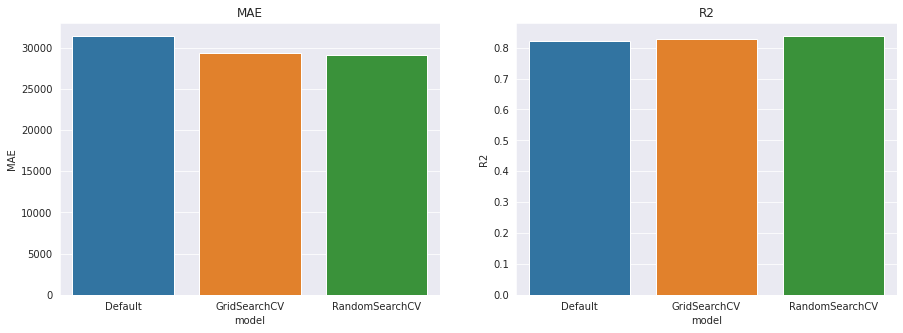

In [129]:
# 하이퍼 파라미터 튜닝 모델 성능 시각화
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(data=perf_df, x='model', y='MAE', ax = axes[0])
axes[0].set_title('MAE')

sns.barplot(data = perf_df, x='model', y='R2', ax= axes[1])
axes[1].set_title('R2')